In [ ]:
# Setup and File Path
import matplotlib.pyplot as plt

# Define the file path
file_path = "data/dna_raw.txt"

print(f"File path : {file_path}")

# Read and open the file
with open(file_path, "r") as file:
    dna_data = file.readlines()
    print(dna_data)

File path : data/dna_raw.txt
['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n', 'gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n', '>seq4\n', 'gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca']


In [ ]:
# Data Processing and Counting
dna_letters = ['a', 't', 'c', 'g']

# Initialize the result list
final_result = []

# Using zip() to pair header lines with sequence lines
# header_id will be an item from the odd indices slice
# sequence_letters will be an item from the even indices slice
for header_id, sequence_letters in zip(dna_data[::2], dna_data[1::2]):
    # Extraction and Cleaning
    seq_id = header_id.strip()[1:]
    sequence = sequence_letters.strip().lower()
    
    # Counting 
    frequency_dict = {letter: 0 for letter in dna_letters}
    for char in sequence:
        if char in frequency_dict:
            frequency_dict[char] += 1
    
    # Output and Storage
    print("\n" + "="*50)
    print(f"Sequence ID: {seq_id}")
    print(f"Dictionary: {frequency_dict}")

    # It stores the final, structured dictionary of counts for every sequence.
    final_result.append({'id': seq_id, 'counts': frequency_dict})

    print("="*50)



Sequence ID: seq1
Dictionary: {'a': 17, 't': 7, 'c': 8, 'g': 2}

Sequence ID: seq2
Dictionary: {'a': 3, 't': 7, 'c': 4, 'g': 10}

Sequence ID: seq3
Dictionary: {'a': 18, 't': 10, 'c': 16, 'g': 16}

Sequence ID: seq4
Dictionary: {'a': 13, 't': 10, 'c': 11, 'g': 18}


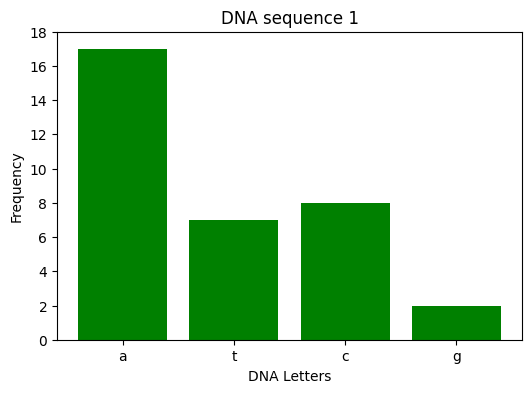

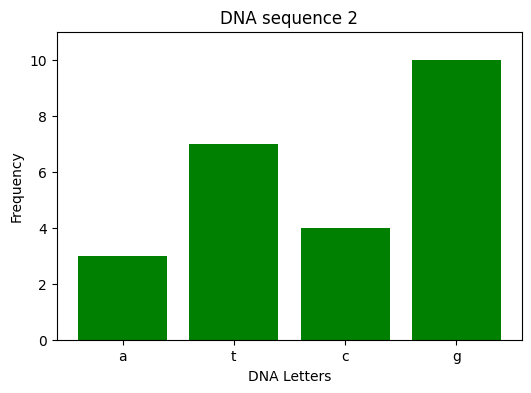

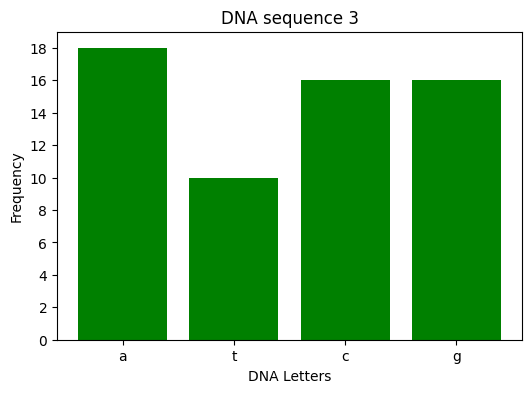

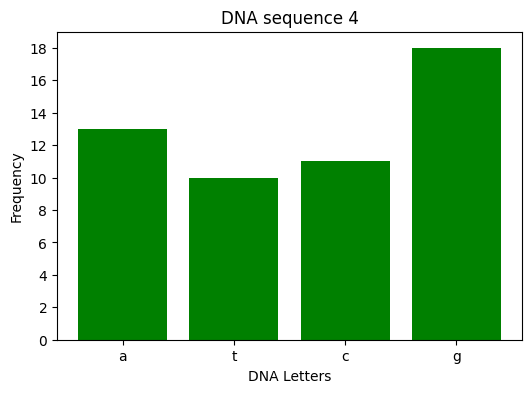

In [ ]:
# Graph Output

# Define the spesific order of categories for the x-axis
dna_letters = ['a', 't', 'c', 'g']

# Defines the numeric positions where the bars will be drawn on the x-axis.
x_coordinates = [1, 2, 3, 4]

# Iterating over the list of sequence data dictionaries.
for result in final_result:
    seq_id = result['id'] 
    frequency_dict = result['counts']

    # Extracts the numeric identifier for the graph title.
    sequence_number = seq_id.lstrip('seq')

    # Extract the frequencies (bar heights) in the correct order
    frequencies = [frequency_dict[l] for l in dna_letters]

    # Creates a figure for the graph.
    plt.figure(figsize=(6, 4))

    # Create the Bar Chart using numeric coordinates and tick_label
    plt.bar(x_coordinates, frequencies, tick_label=dna_letters, color='green')

    #Finds the highest number in the frequencies list. max_freq is 17.
    max_freq = max(frequencies)

    # Defining the Tick Marks, f max_freq=17, then range(0, 19, 2) produces the sequence: 0,2,4,6,8,10,12,14,16,18.
    plt.yticks(range(0, max_freq + 2, 2))

    # The absolute minimum and maximum values displayed on the Y-axis.
    plt.ylim(0, max_freq + 1)

    # Sets the main title for the chart.
    plt.title(f'DNA sequence {sequence_number}')

    # Sets the label for the horizontal (X) axis.
    plt.xlabel('DNA Letters')

    # Sets the label for the vertical (Y) axis.
    plt.ylabel('Frequency')

    # Display the charts
    plt.show()